In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.location_utils import reachFromLocation, angleFromLocation
from src import survey as well_survey

method: tangent
reach0: [67.40417506]
OrderedDict([('Segment 1',
              {'Absolute Reach': 67.404,
               'Dogleg_Severity': 1.253,
               'E': 29.588,
               'N': 60.563,
               'Reach': 65.677,
               'TVD': 1526.565,
               'delta_East': 27.588,
               'delta_North': 56.563,
               'delta_Reach': 62.932,
               'delta_Vertical': 77.715})])
method: balanced_tangent
reach0: [64.61697733]
OrderedDict([('Segment 1',
              {'Absolute Reach': 64.617,
               'Dogleg_Severity': 1.253,
               'E': 27.459,
               'N': 58.481,
               'Reach': 62.961,
               'TVD': 1528.665,
               'delta_East': 25.459,
               'delta_North': 54.481,
               'delta_Reach': 60.145,
               'delta_Vertical': 79.815})])
method: mean_angle
reach0: [64.65363827]
OrderedDict([('Segment 1',
              {'Absolute Reach': 64.654,
               'Dogleg_Severity': 

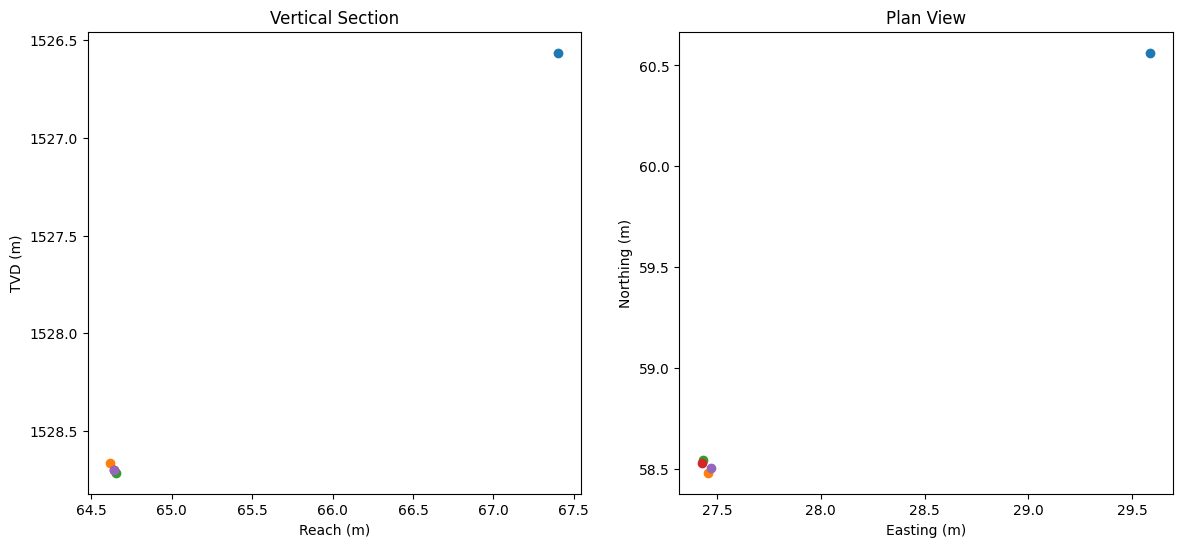

In [2]:
data = [[1500, np.deg2rad(35), np.deg2rad(24)],
        [1600, np.deg2rad(39), np.deg2rad(26)]
        ]
ini_pos = [4,2,1448.85]
# data = [[500, np.deg2rad(0), np.deg2rad(20)],
#         [530, np.deg2rad(2), np.deg2rad(20)],
#         [560, np.deg2rad(4), np.deg2rad(20)],
#         [590, np.deg2rad(6), np.deg2rad(21)],
#         [620, np.deg2rad(8), np.deg2rad(22)],
        # [650, np.deg2rad(10), np.deg2rad(23)],
        # [680, np.deg2rad(12), np.deg2rad(24)],
        # [710, np.deg2rad(14), np.deg2rad(25)],
        # [740, np.deg2rad(16), np.deg2rad(26)],
        # ]
# ini_pos = [0,0,500]
ax1, ax2 = well_survey.get_plot_projection_figs()
for method in [
    "tangent",
    "balanced_tangent",
    "mean_angle",
    "curvature_radius",
    "min_curvature_radius",
    ]:
    print("method:", method)
    segments, path = well_survey.calc_well_path(data, initial_pos=ini_pos, target=np.deg2rad(39),method=method, display=True)
    ax1.plot(path[:,3], path[:,2], marker='o', label=method)
    ax2.plot(path[:,1], path[:,0], marker='o', label=method)
    # for seg in segments:
    # print(segments)

plt.show()





In [3]:
# Trajectory calculation for a Type I directional well (input: vertical depth)
# Input parameters
location = {"origin": (8783845, 726725), "target": (8783190, 726700)}
reach = reachFromLocation(**location)
TVD = 500  # Total vertical depth (m)
KOP = 800        # Kick-off point (m, TVD)
BUR = 2          # Build-up rate (degrees/30m)
# reach = 400  # Target horizontal displacement (m)
print("Angle: {:.2f} degrees".format(np.rad2deg(angleFromLocation(**location))))
          # Target horizontal displacement (m)
well_data = wellplan.WellTypeI(TVD, KOP, BUR, reach)
well_data.calculate()
well_data.printResults()
well_data.generatePath()
well_data.plot()


Angle: 125.24 degrees


NameError: name 'wellplan' is not defined

In [ ]:
# Trajectory calculation for a Type II directional well (input: vertical depth)
# Input parameters
# location = {"origin": (8783845, 726725), "target": (8783190, 726700)}
# reach = reachFromLocation(**location)
# print("Angle: {:.2f} degrees".format(np.rad2deg(angleFromLocation(**location))))
reach = 640      # Target horizontal displacement (m)
KOP = 945        # Kick-off point (m, TVD)
BUR = 2          # Build-up rate (degrees/30m)
DOR = 2          # Drop-off rate (degrees/30m)
TVD = 3109       # Total vertical depth (m)
EOD = 3109
well_data = wellplan.WellTypeII(TVD, KOP, BUR, reach, DOR, EOD)
well_data.calculate()
well_data.printResults()
well_data.plot()

In [ ]:
3209.865 + 200


In [ ]:
# Trajectory calculation for a Type III directional well (input: vertical depth)
# Input parameters
location = {"origin": (8783845, 726725), "target": (8783190, 726700)}
reach = reachFromLocation(**location)
print(reach)
TVD = 3000  # Total vertical depth (m)
BUR = 2          # Build-up rate (degrees/30m)
KOP = wellplan.getKOPFromBUR(reach, TVD, BUR)
# KOP = 2500        # Kick-off point (m, TVD)
# Target horizontal displacement (m)
print("Angle: {:.2f} degrees".format(np.rad2deg(angleFromLocation(**location))))
well_data = wellplan.WellTypeIII(TVD, KOP, BUR, reach)
well_data.calculate()
well_data.printResults()
well_data.generatePath()
well_data.plot()

In [ ]:
# Trajectory calculation for a Horizontal well with a single gain section
# Input parameters
# location = {"origin": (8783845, 726725), "target": (8783190, 726700)}
# reach = reachFromLocation(**location)
# print("Angle: {:.2f} degrees".format(np.rad2deg(angleFromLocation(**location))))
KOP = 305
reach_EOB = 2438
TVD = 1676
hor_sect = 1000
BUR1 = 2
BUR2 = 1.5

# hor_sect = 500
# TVD = 2068
# KOP = 945
# BUR1 = 2
# BUR2 = 3
# KOP = 2500        # Kick-off point (m, TVD)
# Target horizontal displacement (m)
# pilot_well = WellTypeI(TVD, KOP, BUR1, reach, max_build=55)
# pilot_well.calculate()
# pilot_well.printResults()

well_data = wellplan.WellHorizontalDualGain(TVD, KOP, BUR1, BUR2, hor_sect, reach=reach_EOB+hor_sect)
well_data.calculate()
well_data.printResults()
# well_data.generatePath()
well_data.plot()

well_data = wellplan.WellHorizontalSingleGain(TVD, 1000, reach=reach_EOB+hor_sect)
well_data.calculate()
well_data.printResults()
# well_data.generatePath()
well_data.plot()


In [ ]:
well_data.reach_EOB

In [ ]:
WellHorizontalSingleGain:
    def __init__(self, TVD, KOP, reach):